In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import quandl
from fbprophet import Prophet

In [3]:
QUANDL_KEY = '2Y3Ayy5N7QyELtc7axtz'
quandl.ApiConfig.api_key=QUANDL_KEY

In [21]:
df = quandl.get(dataset='WGC/GOLD_DAILY_USD',
                start_date='2000-01-01',
                end_date='2005-12-31')
df

,Value
Date,
2000-01-03,290.25
2000-01-04,281.50
2000-01-05,280.45
2000-01-06,279.40
2000-01-07,282.10
...,...
2005-12-26,500.00
2005-12-27,500.00
2005-12-28,518.00


In [22]:

df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

In [23]:
df

,ds,y
0,2000-01-03,290.25
1,2000-01-04,281.50
2,2000-01-05,280.45
3,2000-01-06,279.40
4,2000-01-07,282.10
...,...,...
1560,2005-12-26,500.00
1561,2005-12-27,500.00
1562,2005-12-28,518.00
1563,2005-12-29,513.00


In [24]:
train_indices = df.ds.apply(lambda x: x.year) < 2005
df_train = df.loc[train_indices].dropna()
df_test = df.loc[-train_indices].reset_index(drop=True)

In [25]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='montly', period = 30.5, fourier_order=5)
model_prophet.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


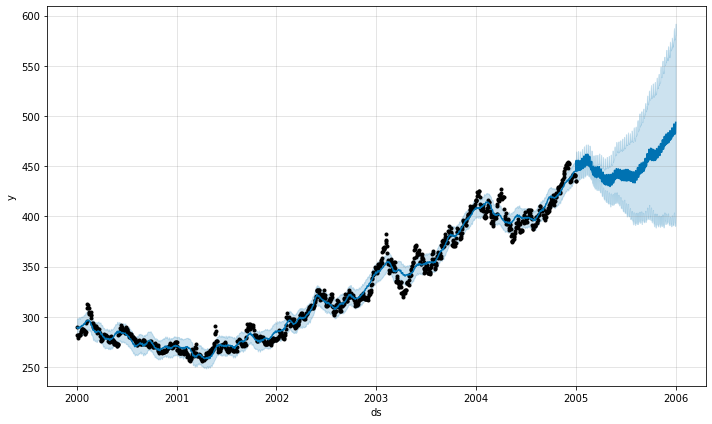

In [26]:
df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred)

plt.tight_layout()

plt.show()

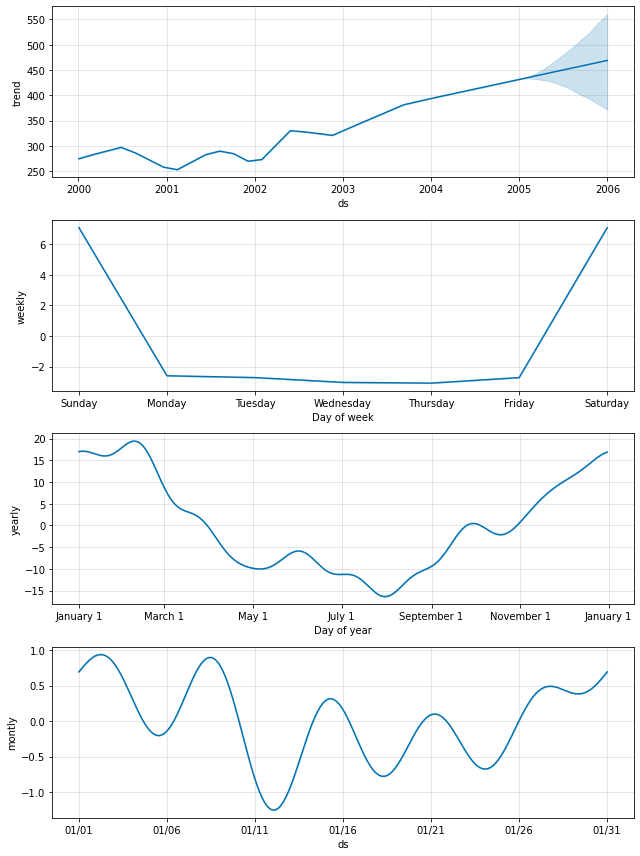

In [20]:
model_prophet.plot_components(df_pred)
plt.tight_layout()

plt.show()

In [27]:
selected_columns = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']

df_pred = df_pred.loc[:, selected_columns].reset_index(drop=True)
df_test = df_test.merge(df_pred, on=['ds'], how='left')
df_test.ds = pd.to_datetime(df_test.ds)
df_test.set_index('ds', inplace=True)

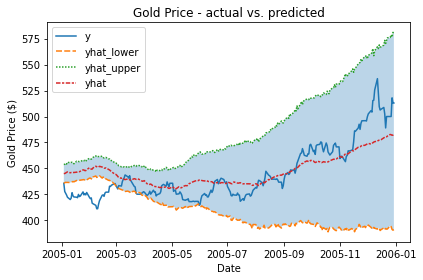

In [28]:
fig, ax = plt.subplots(1, 1)

ax = sns.lineplot(data=df_test[['y', 'yhat_lower', 
                                'yhat_upper', 'yhat']])
ax.fill_between(df_test.index,
                df_test.yhat_lower,
                df_test.yhat_upper,
                alpha=0.3)
ax.set(title='Gold Price - actual vs. predicted',
       xlabel='Date',
       ylabel='Gold Price ($)')

plt.tight_layout()
plt.show()